# Finding the ideal number of cluster 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

In [2]:
hr=pd.read_csv(r'D:\Data_Analysis\Machine Learning\assign\data.csv')
hr.drop(columns=['employee_id','education','department','region','recruitment_channel'],inplace=True)


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                54808 non-null  object 
 1   no_of_trainings       54808 non-null  int64  
 2   age                   54808 non-null  int64  
 3   previous_year_rating  50684 non-null  float64
 4   length_of_service     54808 non-null  int64  
 5   KPIs_met >80%         54808 non-null  int64  
 6   awards_won?           54808 non-null  int64  
 7   avg_training_score    54808 non-null  int64  
 8   is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 3.8+ MB


In [4]:
## let's find number of promotion from how many times get training 
pro=hr.groupby('no_of_trainings')['is_promoted'].count()
pro

no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
9         5
10        5
Name: is_promoted, dtype: int64

In [5]:
## let's convert classification column intio dummies variable
hr=pd.get_dummies(hr,columns=['gender'],drop_first=True)

In [6]:
hr.isnull().sum()

no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
gender_m                   0
dtype: int64

In [7]:
hr.skew()

no_of_trainings         3.445434
age                     1.007432
previous_year_rating   -0.310638
length_of_service       1.738061
KPIs_met >80%           0.619909
awards_won?             6.338914
avg_training_score      0.451908
is_promoted             2.972339
gender_m               -0.885300
dtype: float64

In [8]:
## fill the value of null values in previous year rating after checking skewness in it. its lies between -1 & 1 so
## we replace null values with mean
hr['previous_year_rating']=hr['previous_year_rating'].fillna(hr['previous_year_rating'].mean())

In [9]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_trainings       54808 non-null  int64  
 1   age                   54808 non-null  int64  
 2   previous_year_rating  54808 non-null  float64
 3   length_of_service     54808 non-null  int64  
 4   KPIs_met >80%         54808 non-null  int64  
 5   awards_won?           54808 non-null  int64  
 6   avg_training_score    54808 non-null  int64  
 7   is_promoted           54808 non-null  int64  
 8   gender_m              54808 non-null  uint8  
dtypes: float64(1), int64(7), uint8(1)
memory usage: 3.4 MB


In [10]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,54808.0,3.329256,1.211661,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0
gender_m,54808.0,0.702379,0.457216,0.0,0.0,1.0,1.0,1.0


In [11]:
hr.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_m
no_of_trainings,1.000000,-0.081278,-0.059804,-0.057275,-0.045576,-0.007628,0.042517,-0.024896,0.084501
age,-0.081278,1.000000,0.005710,0.657111,-0.025592,-0.008169,-0.048380,-0.017166,-0.016293
previous_year_rating,-0.059804,0.005710,1.000000,0.000239,0.338134,0.026669,0.072065,0.153406,-0.023333
length_of_service,-0.057275,0.657111,0.000239,1.000000,-0.077693,-0.039927,-0.038122,-0.010670,-0.019675
KPIs_met >80%,-0.045576,-0.025592,0.338134,-0.077693,1.000000,0.097000,0.078391,0.221582,-0.037400
awards_won?,-0.007628,-0.008169,0.026669,-0.039927,0.097000,1.000000,0.072138,0.195871,0.002381
avg_training_score,0.042517,-0.048380,0.072065,-0.038122,0.078391,0.072138,1.000000,0.181147,-0.024494
is_promoted,-0.024896,-0.017166,0.153406,-0.010670,0.221582,0.195871,0.181147,1.000000,-0.011109
gender_m,0.084501,-0.016293,-0.023333,-0.019675,-0.037400,0.002381,-0.024494,-0.011109,1.000000


In [12]:
hr.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_m
0,1,35,5.0,8,1,0,49,0,0
1,1,30,5.0,4,0,0,60,0,1
2,1,34,3.0,7,0,0,50,0,1
3,2,39,1.0,10,0,0,50,0,1
4,1,45,3.0,2,0,0,73,0,1


C:\Users\Maddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_training_score', ylabel='length_of_service'>

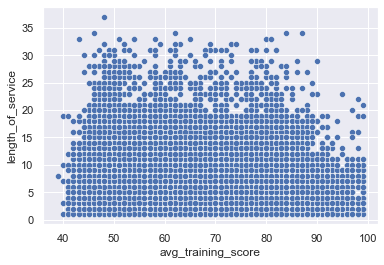

In [13]:
sn.scatterplot(hr['avg_training_score'],hr['length_of_service'])

<AxesSubplot:xlabel='avg_training_score', ylabel='Count'>

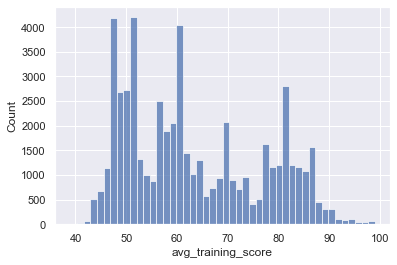

In [14]:
sn.histplot(hr['avg_training_score'])

In [15]:
hr.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_m
0,1,35,5.0,8,1,0,49,0,0
1,1,30,5.0,4,0,0,60,0,1
2,1,34,3.0,7,0,0,50,0,1
3,2,39,1.0,10,0,0,50,0,1
4,1,45,3.0,2,0,0,73,0,1


In [16]:
## building the cluster model

In [17]:
from sklearn.cluster import KMeans
##Plotting the elbow value first

In [18]:
error = []
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(hr)
    error.append(km.inertia_)

In [19]:
error

[14142663.586049007,
 6475480.246325808,
 4750788.170745925,
 3758465.861123746,
 3065184.3194793263,
 2737385.8035429134,
 2432712.654671686,
 2187731.8342520255,
 1987563.9449521974,
 1874271.9012237652]

C:\Users\Maddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


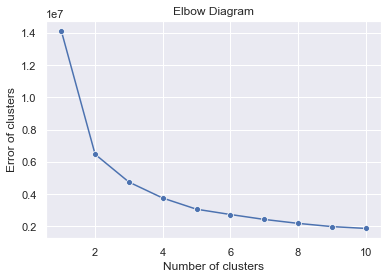

In [20]:
sn.lineplot(range(1,11),error,marker='o')
plt.title('Elbow Diagram')
plt.xlabel('Number of clusters')
plt.ylabel('Error of clusters')
plt.show()

In [21]:
## L-bow gram show that we need atleast 9 cluster to reduce error in our model
## it infer that for if we need less error we have to analyse the elbow diagram and where the line diverge less 
## from where we can select our number of cluster and number of cluster are minimum distance from their corresponding area

In [22]:
km_9= KMeans(n_clusters=9).fit(hr)

In [23]:
cluster=km_9.fit_predict(hr)

In [24]:
hr['cluster']=cluster

In [25]:
hr.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_m,cluster
0,1,35,5.0,8,1,0,49,0,0,4
1,1,30,5.0,4,0,0,60,0,1,2
2,1,34,3.0,7,0,0,50,0,1,4
3,2,39,1.0,10,0,0,50,0,1,4
4,1,45,3.0,2,0,0,73,0,1,8


In [26]:
hr['cluster'].value_counts()

0    8944
2    7938
6    7812
4    7739
7    6043
1    5897
5    4671
3    3464
8    2300
Name: cluster, dtype: int64

C:\Users\Maddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_training_score', ylabel='length_of_service'>

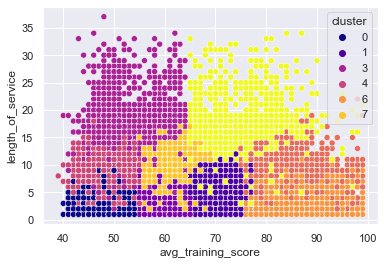

In [27]:
sn.scatterplot(hr['avg_training_score'],hr['length_of_service'],hue=hr['cluster'],palette='plasma')